In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [15]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
area = meshmask.e1t[0] * meshmask.e2t[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [41]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [42]:
new_chem = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/fixed_restart/SalishSea_1h_20180101_20180131_chem_T.nc')
new_bio = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/fixed_restart/SalishSea_1h_20180101_20180131_biol_T.nc')
base_total_alkalinity = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_chem_T.nc', 
                                  data_vars = ['total_alkalinity'])
base_ammonium = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_biol_T.nc', 
                                  data_vars = ['ammonium'])
base_CO2_flux = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_chem_T.nc', 
                                  data_vars = ['CO2_flux'])




In [43]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
time_slice = slice(0, 120)

new_chem_slice = new_chem.isel(time_counter = time_slice, y = y_slice, x = x_slice)
new_bio_slice = new_bio.isel(time_counter = time_slice, y = y_slice, x = x_slice)
base_total_alkalinity_slice = base_total_alkalinity.isel(time_counter = time_slice, y = y_slice, x = x_slice)
base_ammonium_slice = base_ammonium.isel(time_counter = time_slice, y = y_slice, x = x_slice)
base_CO2_flux_slice = base_CO2_flux.isel(time_counter = time_slice, y = y_slice, x = x_slice)

In [19]:
def plotSumDiffTimeLine(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    max_depth = sum_diff.argmax(dim = 'deptht')
    sum_diff.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for Sum of difference for {field}')
    axs.plot(sum_diff['time_counter'], sum_diff['deptht'][max_depth], 'r-')
    axs.set_ylim(150, 0)

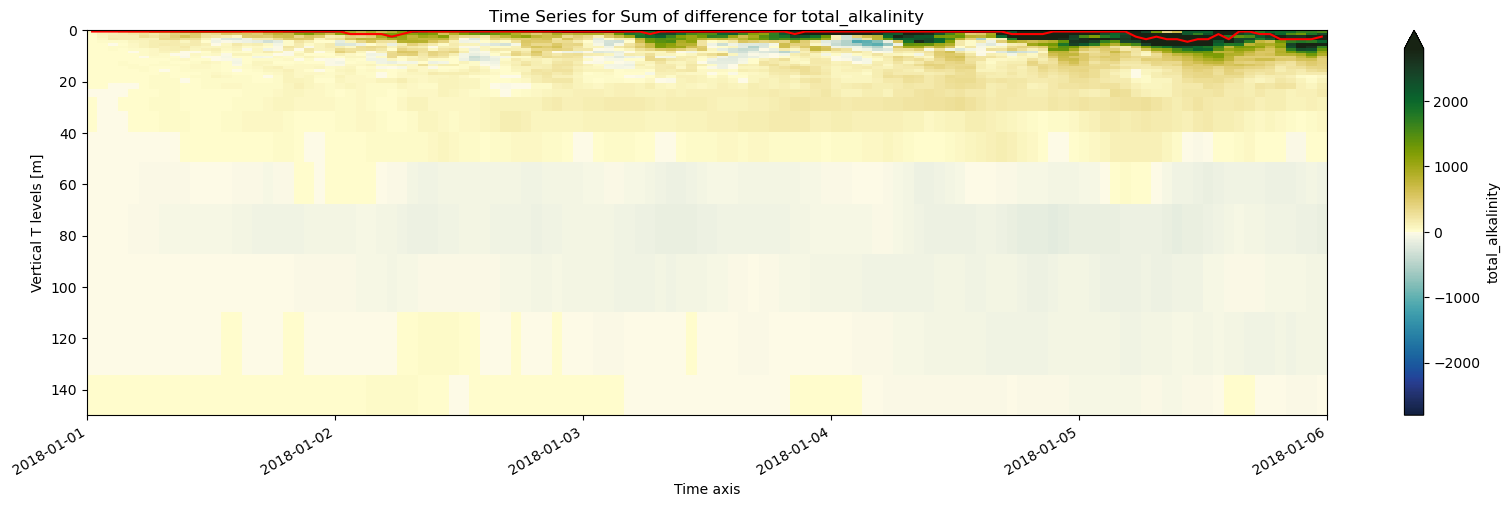

In [9]:
plotSumDiffTimeLine(base_total_alkalinity_slice, new_chem_slice, 'total_alkalinity', -2800, 2800, cm_delta)

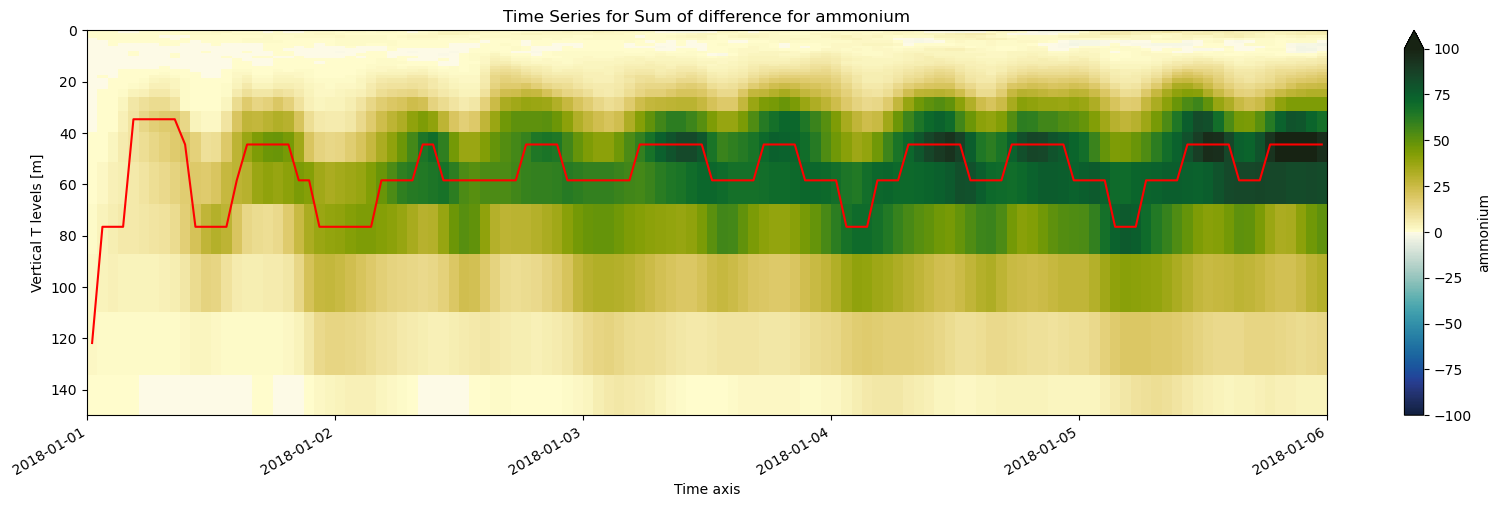

In [17]:
plotSumDiffTimeLine(base_ammonium_slice, new_bio_slice, 'ammonium', -100, 100, cm_delta)

In [12]:
new_chem_p1 = new_chem.sel(deptht = 121.866516, y = 447, x = 304)
base_total_alkalinity_p1 = base_total_alkalinity.sel(deptht = 121.866516, y = 447, x = 304)

new_chem_p2 = new_chem.sel(deptht = 98.06296, y = 446, x = 304)
base_total_alkalinity_p2 = base_total_alkalinity.sel(deptht = 98.06296, y = 446, x = 304)

new_chem_p3= new_chem.sel(deptht = 98.06296, y = 447, x = 305)
base_total_alkalinity_p3 = base_total_alkalinity.sel(deptht = 98.06296, y = 447, x = 305)

new_chem_p4= new_chem.sel(deptht = 76.58559, y = 446, x = 305)
base_total_alkalinity_p4 = base_total_alkalinity.sel(deptht = 76.58559, y = 446, x = 305)

Text(0, 0.5, 'Total Alkalinity')

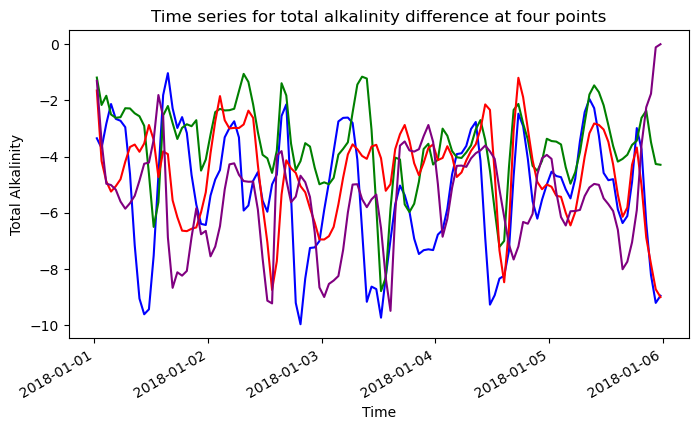

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
diff1 = new_chem_p1.total_alkalinity - base_total_alkalinity_p1.total_alkalinity
diff1.plot.line(x = "time_counter", ax = axs, color = 'blue')

diff2 = new_chem_p2.total_alkalinity - base_total_alkalinity_p2.total_alkalinity
diff2.plot.line(x = "time_counter", ax = axs, color = 'green')

diff3 = new_chem_p3.total_alkalinity - base_total_alkalinity_p3.total_alkalinity
diff3.plot.line(x = "time_counter", ax = axs, color = 'red')

diff4 = new_chem_p4.total_alkalinity - base_total_alkalinity_p4.total_alkalinity
diff4.plot.line(x = "time_counter", ax = axs, color = 'purple')

axs.set_title('Time series for total alkalinity difference at four points')
axs.set_xlabel('Time')
axs.set_ylabel('Total Alkalinity')

In [15]:
new_bio_p1 = new_bio.sel(deptht = 121.866516, y = 447, x = 304)
base_ammonium_p1 = base_ammonium.sel(deptht = 121.866516, y = 447, x = 304)

new_bio_p2 = new_bio.sel(deptht = 98.06296, y = 446, x = 304)
base_ammonium_p2 = base_ammonium.sel(deptht = 98.06296, y = 446, x = 304)

new_bio_p3= new_bio.sel(deptht = 98.06296, y = 447, x = 305)
base_ammonium_p3 = base_ammonium.sel(deptht = 98.06296, y = 447, x = 305)

new_bio_p4= new_bio.sel(deptht = 76.58559, y = 446, x = 305)
base_ammonium_p4 = base_ammonium.sel(deptht = 76.58559, y = 446, x = 305)

Text(0, 0.5, 'Ammonium')

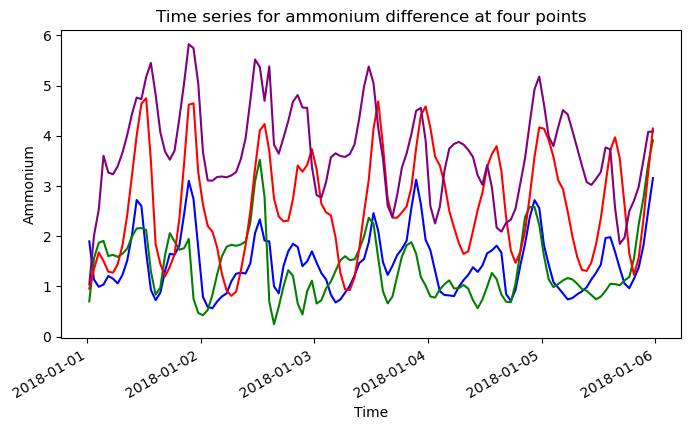

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
diff1 = new_bio_p1.ammonium - base_ammonium_p1.ammonium
diff1.plot.line(x = "time_counter", ax = axs, color = 'blue')

diff2 = new_bio_p2.ammonium - base_ammonium_p2.ammonium
diff2.plot.line(x = "time_counter", ax = axs, color = 'green')

diff3 = new_bio_p3.ammonium - base_ammonium_p3.ammonium
diff3.plot.line(x = "time_counter", ax = axs, color = 'red')

diff4 = new_bio_p4.ammonium - base_ammonium_p4.ammonium
diff4.plot.line(x = "time_counter", ax = axs, color = 'purple')

axs.set_title('Time series for ammonium difference at four points')
axs.set_xlabel('Time')
axs.set_ylabel('Ammonium')